In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
from datetime import datetime
import json
import requests

In [3]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

Data from the Bureau of Labor Statistics on [Total Monthly Employment Numbers](https://data.bls.gov/timeseries/CES0000000001).

In [18]:
# headers = {'Content-type': 'application/json'}
# data = json.dumps({"seriesid": ['CES0000000001'],"startyear":"1970", "endyear":"2021"})
# p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
# json_data = json.loads(p.text)

In [19]:
# url = 'https://download.bls.gov/pub/time.series/ce/ce.data.00a.TotalNonfarm.Employment'
# df = pd.read_csv(url)

In [4]:
os.listdir(os.path.join('..', 'data_raw'))

['employment_numbers_2020_08_24.xlsx',
 'employment_all_in_thousands.xlsx',
 'real_hourly_earnings.tsv']

In [5]:
CSV_PATH = os.path.join('..', 'data_raw', 'employment_numbers_2020_08_24.xlsx')
df = pd.read_excel(CSV_PATH, skiprows=12)
df.head(15)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1976,78503,78816,79048,79292,79312,79376,79547,79704.0,79892.0,79911.0,80240.0,80448.0
1,1977,80690,80988,81391,81728,82088,82488,82834,83075.0,83532.0,83800.0,84173.0,84410.0
2,1978,84594,84948,85460,86162,86509,86950,87204,87483.0,87621.0,87956.0,88391.0,88671.0
3,1979,88808,89055,89479,89417,89789,90108,90217,90300.0,90327.0,90481.0,90573.0,90672.0
4,1980,90800,90883,90994,90849,90420,90101,89840,90099.0,90213.0,90490.0,90747.0,90943.0
5,1981,91033,91105,91210,91283,91296,91490,91601,91565.0,91477.0,91380.0,91171.0,90895.0
6,1982,90565,90563,90434,90150,90107,89865,89521,89363.0,89183.0,88907.0,88786.0,88771.0
7,1983,88990,88917,89090,89364,89644,90021,90437,90129.0,91247.0,91520.0,91875.0,92230.0
8,1984,92673,93157,93429,93792,94098,94479,94789,95032.0,95344.0,95629.0,95982.0,96107.0
9,1985,96372,96503,96842,97038,97312,97459,97648,97840.0,98045.0,98233.0,98443.0,98609.0


In [6]:
employment = df.melt(id_vars=['Year'])
employment.dropna(inplace=True)
employment['value'] = employment['value'].astype('int64')
employment['Year'] = employment['Year'].astype(str)
employment['date'] = employment['variable'] + ' 15, ' + employment['Year']
employment['date'] = pd.to_datetime(employment['date'], format='%b %d, %Y')
employment = employment.set_index('date').sort_index()

In [7]:
employment.head()

,Year,variable,value
date,,,
1976-01-15,1976,Jan,78503
1976-02-15,1976,Feb,78816
1976-03-15,1976,Mar,79048
1976-04-15,1976,Apr,79292
1976-05-15,1976,May,79312


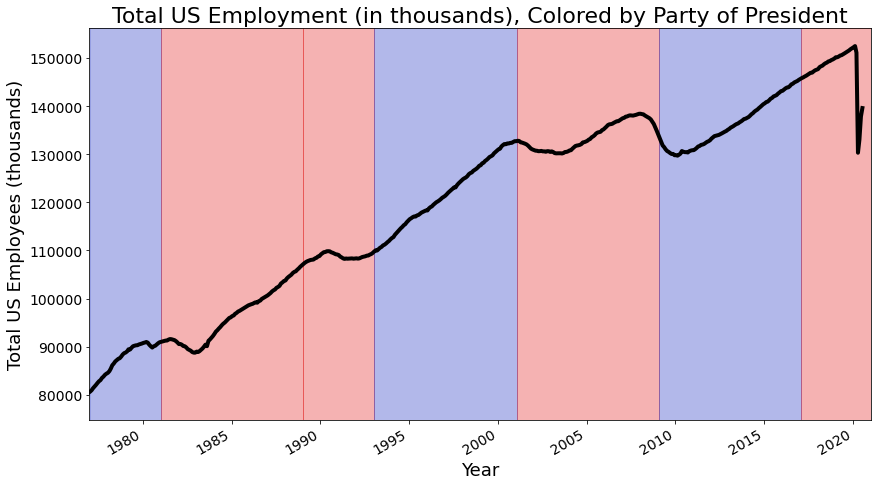

In [9]:
ax = employment.loc[:, 'value'].plot(figsize=(14, 8), linewidth=4, color='black', 
                     label='Employment (in thousands)')
dem_blue = '#0015bc'
gop_red = '#de0100'
ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1977', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1981', '%b %d, %Y'), 
           color=dem_blue, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1981', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1989', '%b %d, %Y'), 
           color=gop_red, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color=gop_red, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color=dem_blue, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color=gop_red, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color=dem_blue, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2021', '%b %d, %Y'), 
           color=gop_red, lw=1, alpha=0.3)
ax.set_xlim((['1976-12-31', '2021']))
ax.set_ylabel('Total US Employees (thousands)', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_title('Total US Employment (in thousands), Colored by Party of President', fontsize=22)

outpath = os.path.join('..', 'images', 'total_employment_long_range.png')
plt.savefig(outpath, transparent=False, facecolor='white', edgecolor='black')

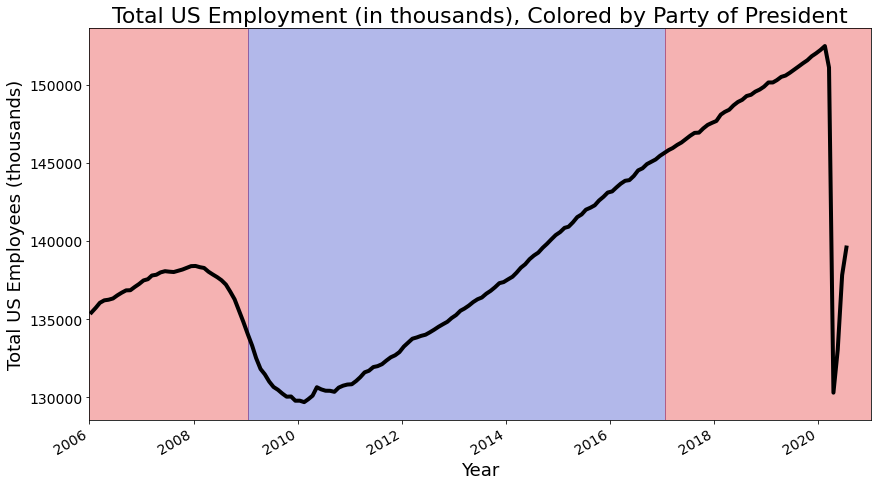

In [10]:
ax = employment.loc['2006':'2020', 'value'].plot(figsize=(14, 8), linewidth=4, color='black', 
                     label='Employment (in thousands)')
ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color='#0015bc', lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2021', '%b %d, %Y'), 
           color='#de0100', lw=1, alpha=0.3)
ax.set_xlim((['2006', '2021']))
ax.set_ylabel('Total US Employees (thousands)', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_title('Total US Employment (in thousands), Colored by Party of President', fontsize=22)

outpath = os.path.join('..', 'images', 'total_employment_since_2006.png')
plt.savefig(outpath, transparent=False, facecolor='white', edgecolor='black')

<AxesSubplot:xlabel='date'>

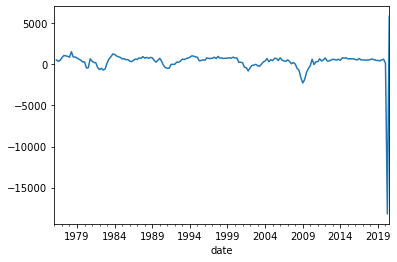

In [26]:
employment['value'].resample('Q').mean().diff().plot()

<AxesSubplot:xlabel='date'>

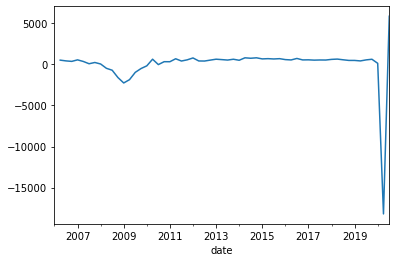

In [29]:
employment.loc['2006':, 'value'].resample('Q').mean().diff().plot()

In [153]:
# emp_df.loc['1996':'2015', 'value']

In [13]:
emp_diff = employment.loc['1996':'2015', 'value'].diff()

In [14]:
emp_diff.head()

date
1996-01-15      NaN
1996-02-15    421.0
1996-03-15    257.0
1996-04-15    167.0
1996-05-15    328.0
Name: value, dtype: float64

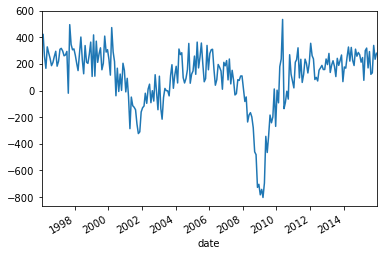

In [15]:
emp_diff['1990':'2020'].plot()

Wow! 

Text(0.5, 0, 'Date')

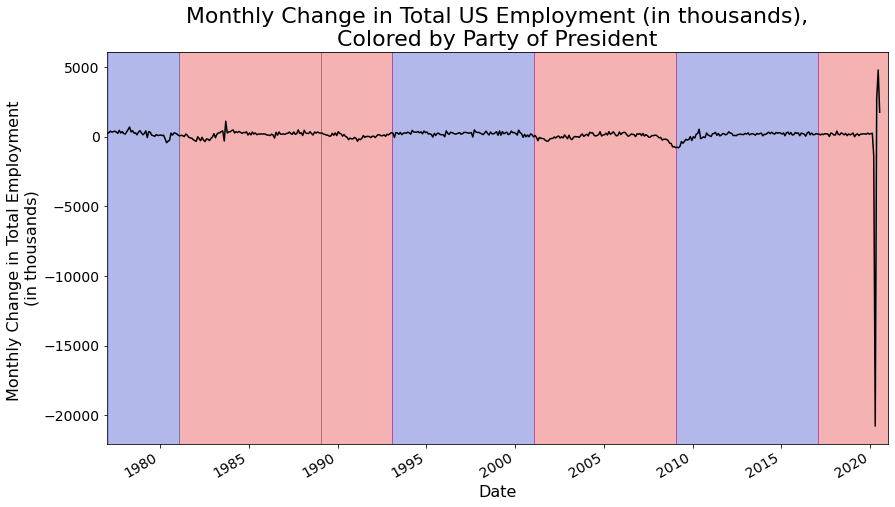

In [63]:
start_date = '1976-01-01'
end_date = '2020-12-31'
fs = 16

emp_diff = employment.loc[start_date: end_date, 'value'].diff()
ax = emp_diff[start_date: end_date].plot(x='date', y='value', figsize=(14, 8), linewidth=1.5, color='black', 
                     label='Employment (in thousands)')

dem_blue = '#0015bc'
gop_red = '#de0100'
ax.tick_params(labelsize=14)
ax.axvspan(datetime.strptime('Jan 20, 1977', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1981', '%b %d, %Y'), 
           color=dem_blue, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1981', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1989', '%b %d, %Y'), 
           color=gop_red, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
           datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
           color=gop_red, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
           color=dem_blue, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
           color=gop_red, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
           color=dem_blue, lw=1, alpha=0.3)
ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
           datetime.strptime('Jan 20, 2021', '%b %d, %Y'), 
           color=gop_red, lw=1, alpha=0.3)
ax.set_xlim((['1976-12-31', '2021']))
ax.set_title('Monthly Change in Total US Employment (in thousands),\nColored by Party of President', fontsize=22)
ax.set_ylabel('Monthly Change in Total Employment \n(in thousands)', fontsize=fs)
ax.set_xlabel('Date', fontsize=fs)

In [66]:
def monthly_change(df, start_date, end_date, fs):
    ax = df.loc[start_date: end_date, 'value'].diff().plot(figsize=(14, 8), 
                                                           linewidth=1.5, 
                                                           color='black', 
                                                           label='Employment (in thousands)')
    dem_blue = '#0015bc'
    gop_red = '#de0100'
    ax.tick_params(labelsize=14)
    ax.axvspan(datetime.strptime('Jan 20, 1977', '%b %d, %Y'),
               datetime.strptime('Jan 20, 1981', '%b %d, %Y'), 
               color=dem_blue, lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 1981', '%b %d, %Y'),
               datetime.strptime('Jan 20, 1989', '%b %d, %Y'), 
               color=gop_red, lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 1989', '%b %d, %Y'),
               datetime.strptime('Jan 20, 1993', '%b %d, %Y'), 
               color=gop_red, lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 1993', '%b %d, %Y'),
               datetime.strptime('Jan 20, 2001', '%b %d, %Y'), 
               color=dem_blue, lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 2001', '%b %d, %Y'),
               datetime.strptime('Jan 20, 2009', '%b %d, %Y'), 
               color=gop_red, lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 2009', '%b %d, %Y'),
               datetime.strptime('Jan 20, 2017', '%b %d, %Y'), 
               color=dem_blue, lw=1, alpha=0.3)
    ax.axvspan(datetime.strptime('Jan 20, 2017', '%b %d, %Y'),
               datetime.strptime('Jan 20, 2021', '%b %d, %Y'), 
               color=gop_red, lw=1, alpha=0.3)
    ax.set_ylabel('Monthly Change in Total Employment \n(in thousands)', fontsize=fs)
    ax.set_xlabel('Date', fontsize=fs)
    ax.set_xlim([start_date, end_date])

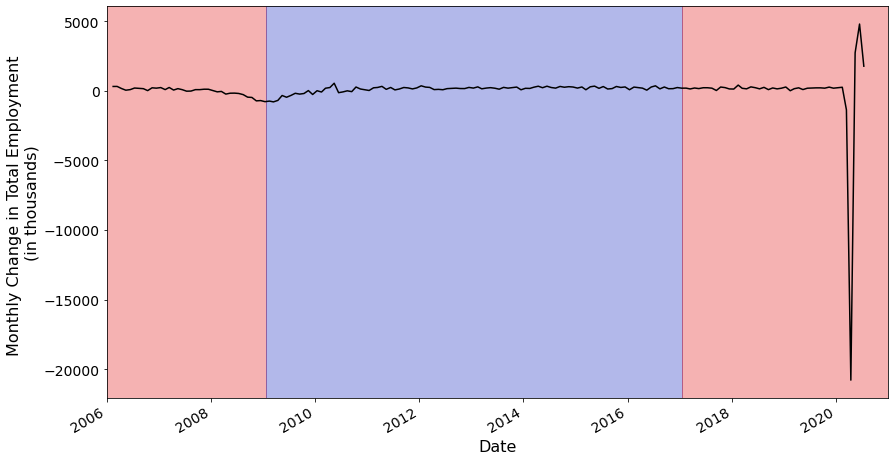

In [67]:
monthly_change(employment, start_date='2006-01-01', end_date='2020-12-31', fs=16)

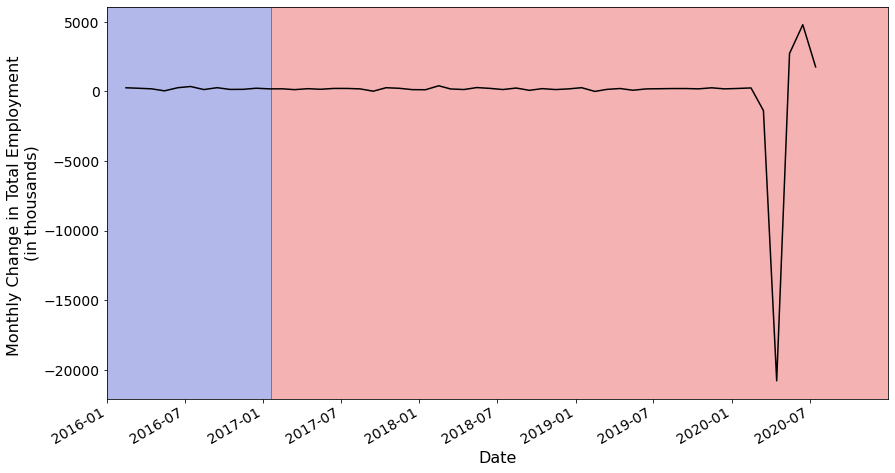

In [68]:
monthly_change(employment, start_date='2016-01-01', end_date='2020-12-31', fs=16)

[real hourly earnings](https://www.bls.gov/opub/ted/2019/real-average-hourly-earnings-up-1-point-3-percent-from-may-2018-to-may-2019.htm) data

[Median weakly earnings](https://www.bls.gov/opub/ted/2014/ted_20140423.htm) data